In [ ]:
import wordcloud

In [ ]:
'''
6.2 jieba
中文分词库
cut_all将所有可能的分词组合都生成出来，cut_all false就是精确模式。默认为False
'''
#jiaba.cut(s,cut_all = True)
import jieba
s= "丧是一种生活态度，running man里面最喜欢李弃昨"
seg_list = jieba.cut(s,cut_all = True)
#for word in seg_list:
#    print(word)
print("/".join(seg_list))

In [ ]:
seg_list = jieba.cut(s,cut_all = False)
print("/".join(seg_list))

In [ ]:
seg_list = jieba.cut(s)
print("/".join(seg_list))

In [ ]:
s = "谁都知道这几年，互联网发展迅速，几乎取代了传统的零售方式，让我们的生活处处与网有关。可正在互联网已经发展的如火如荼的阶段，却开始流传着互联网公司... "
seg_list=jieba.cut_for_search(s)
print("/".join(seg_list))
'''
适合用于搜索引擎构建倒排序索引的分词，粒度比较细。
字符串可以是gbk，utf-8或unicode
返回的都是generator
'''



In [1]:
'''
6.2.2  词频与分词字典
词频 Term Frequency TF 某个给定词语在该文件中出现的次数，次数通常会被正规化，防止偏向长文件。
分词后，我们有时需要输出高频词汇，想要获取分词结果中的高频词汇。
'''
import jieba
from collections import Counter

with open(r'sourcedata/pachong.txt',encoding='utf-8') as file:
        content = file.read()
        #print(Counter(content).most_common(10))
## 此时输出的是无意义的字符

con_words = [x for x in jieba.cut(content) if len(x)>=2]
Counter(con_words).most_common(10)


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/49/5hhwnsdd505cjy1cpl8ftfr80000gn/T/jieba.cache
Loading model cost 1.030 seconds.
Prefix dict has been built succesfully.


[('标题', 106),
 ('中北大学', 28),
 ('学姐', 28),
 ('贵校', 24),
 ('考生', 24),
 ('理科', 22),
 ('学长', 22),
 ('专业', 20),
 ('一本', 18),
 ('毕业生', 12)]

In [ ]:
'''指定自定义字典
jiaba.load_userdict(file_name)
file_name为文件类对象或自定义词典的路径
词典格式：一个词占一行；每一行分为词语，词频，词性三部分，空格隔开，顺序不可颠倒。
file_name如果是路径或二进制方式打开的文件，则文件必须为utf-8编码。

'''
txt = '欧阳建国是创新班主任也是欢聚时代公司云计算方面的专家'
jieba.load_userdict('sourcedata/user_dict.txt')
with open('sourcedata/user_dict.txt','r') as dicts:
    print(dicts.read())
with open('sourcedata/Eric_dict.txt','r') as dicts:
    print(dicts.read())
    
print(','.join(jieba.cut(txt)))

In [2]:
word= ['李光洙','周三胖']
time = [1,2]
wordtype = ["",""]
with open('sourcedata/Eric_dict.txt','w') as userDict:
    for i in range(0,2):
        userDict.write('{0} {1}'.format(word[i],time[i]))
        userDict.write('\n')

txt2 = '李光洙跟周三胖都是running man的成员'
#jieba.load_userdict('sourcedata/Eric_dict.txt')
print(','.join(jieba.cut(txt2)))

李光洙,跟,周三,胖,都,是,running, ,man,的,成员


记者 刚刚 从 市场监管 总局 网站 获悉 ， 市场监管 总局 2 月 18 日 发文 通报 ， 撤销 同仁堂 中国 质量奖 称号 。 经济日报 - 中国 经济网 记者 获悉 ， 近期 ， 中国 北京 同仁堂 ( 集团 ) 有限责任 公司 下属 的 北京 同仁堂 蜂业 有限公司 因 更换 标签 虚假 标注 生产日期 和 使用 回收 蜂蜜 作为 原料 生产 蜂蜜 受到 行政处罚 。 根据 《 中国 质量奖 管理 办法 》 ( 原 质检 总局 令 第 167 号 ) 第三十二条 ： “ 获奖 组织 和 个人 两年 内 发生 重大 质量 和 安全事故 、 发生 违法 、 违规 、 违纪行为 ， 撤销 奖励 并 公开 通报 ” ， 经 市场监管 总局 研究 决定 ， 撤销 中国 北京 同仁堂 ( 集团 ) 有限责任 公司 “ 中国 质量奖 ” 称号 ， 收回 证书 和 奖杯 。 很多 消费者 得知 这个 消息 纷纷表示 ， 百年 老字号 不 珍惜 质量 声誉 ， 接连 发生 质量 安全事件 。 对于 至 高 荣誉 不 珍惜 的 结果 是 不仅 遭到 消费者 的 鄙视 ， 也 受到 相关 部门 的 处理 ， 这是 咎由自取 。 希望 百年 老字号 同仁堂 珍惜 老祖宗 传承 的 “ 炮制 虽 繁必 不敢 省 人工 ， 品味 虽贵必 不敢 减 物力 ” 经营 理念 ， 遵循 “ 修合 无人 见 ， 存心 有 天知 ” 的 良心 古训 ， 重振 百年 品牌 昔日 辉煌 。


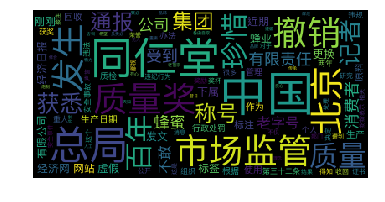

In [18]:
'''
6.3 文本词云图

'''
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

s1 = "记者刚刚从市场监管总局网站获悉，市场监管总局2月18日发文通报，撤销同仁堂中国质量奖称号。"

s2 = "经济日报-中国经济网记者获悉，近期，中国北京同仁堂(集团)有限责任公司下属的北京同仁堂蜂业有限公司因更换标签虚假标注生产日期和使用回收蜂蜜作为原料生产蜂蜜受到行政处罚。"

s3= "根据《中国质量奖管理办法》(原质检总局令第167号)第三十二条：“获奖组织和个人两年内发生重大质量和安全事故、发生违法、违规、违纪行为，撤销奖励并公开通报”，经市场监管总局研究决定，撤销中国北京同仁堂(集团)有限责任公司“中国质量奖”称号，收回证书和奖杯。"

s4 = "很多消费者得知这个消息纷纷表示，百年老字号不珍惜质量声誉，接连发生质量安全事件。对于至高荣誉不珍惜的结果是不仅遭到消费者的鄙视，也受到相关部门的处理，这是咎由自取。希望百年老字号同仁堂珍惜老祖宗传承的“炮制虽繁必不敢省人工，品味虽贵必不敢减物力”经营理念，遵循“修合无人见，存心有天知”的良心古训，重振百年品牌昔日辉煌。"
mylist = [s1,s2,s3,s4] 
# 文章放入列表
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist] # 列表中的文章进行分词
new_text = ' '.join(word_list) # 分词后的单词用空格连接
print(new_text)
wordcloud = WordCloud(font_path='/System/Library/Fonts/PingFang.ttc',background_color="black").generate(new_text)
print(wordcloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

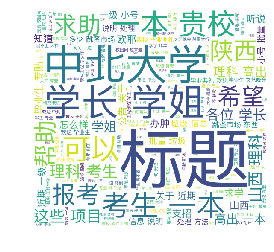

In [29]:
import jieba
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import matplotlib.pyplot as plt
import imageio


text= open(r'sourcedata/pachong.txt',encoding='utf-8')
mylist = list(text)
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist] # 列表中的文章进行分词
new_text = ' '.join(word_list) # 分词后的单词用空格连接
pac_mask = imageio.imread('sourcedata/1114_rain_03.png')
wordcloud = WordCloud(font_path='/System/Library/Fonts/PingFang.ttc',background_color="white",mask=pac_mask).generate(new_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("sourcedata/resultWc.png")

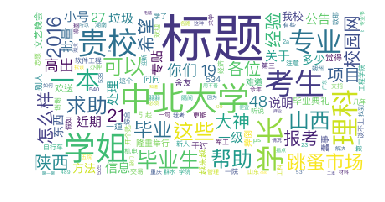

In [31]:
'''
6.4背景轮廓词云图的制作
6.4.1 数据准备
6.4.2 分词
wordcloud.WordCloud(font_path=,
                    width=,
                    height=,
                    margin=,
                    ranks_only=,
                    mask=,
                    max_words=,显示最大词数
                    stopwords=,#需要屏蔽的词
                    mode='RGB')
'''
import jieba
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import matplotlib.pyplot as plt
import imageio
from collections import Counter


text= open(r'sourcedata/pachong.txt',encoding='utf-8')
mylist = list(text)
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist] # 列表中的文章进行分词
new_text = ' '.join(word_list) # 分词后的单词用空格连接
con_words= [x for x in jieba.cut(new_text) if len(x)>=2]
frequencies = Counter(con_words).most_common()
frequencies = dict(frequencies)
#pac_mask = imageio.imread('sourcedata/1114_rain_03.png')
wordcloud = WordCloud(font_path='/System/Library/Fonts/PingFang.ttc',background_color="white").fit_words(frequencies)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("sourcedata/resultWc.png")

'''
generate(txt) 根据文本生成词云
fit_words(frequencies)根据词频生成词云
generate_from_frequencies(frequencies[,...]) 根据词频生成词云
generate_from_text(text) 根据文本生成词云
to_file(filename)
to_array()转换为numpy array
'''